In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
sns.set_style('whitegrid')

In [2]:
%matplotlib inline

In [3]:
import sklearn

In [4]:
from sklearn.datasets import load_boston

In [13]:
boston=load_boston()

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0.5,0,'Prices in $1000')

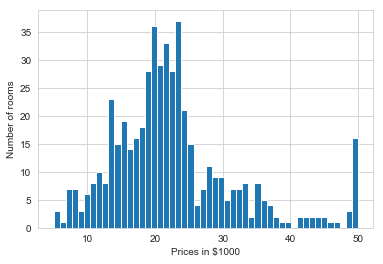

In [7]:
plt.hist(boston.target,bins=50)
plt.ylabel("Number of rooms")
plt.xlabel("Prices in $1000")

In [19]:
boston_df=DataFrame(boston.data)
boston_df.columns=boston.feature_names

In [20]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


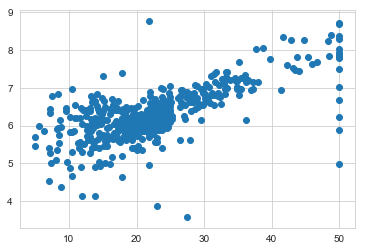

In [22]:
plt.scatter(boston.target,boston_df['RM'],data=boston_df)

Text(0.5,0,'Number of rooms')

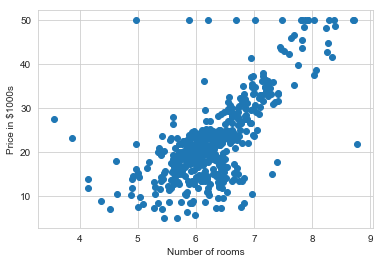

In [23]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [25]:
boston_df=DataFrame(boston.data)
boston_df.columns=boston.feature_names

In [26]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
boston_df['Price']=boston.target

In [28]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


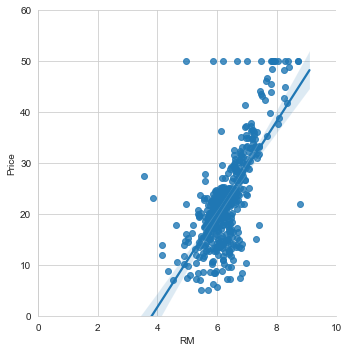

In [29]:
fig=sns.lmplot('RM','Price',data=boston_df)
fig.set(xlim=[0,10])
fig.set(ylim=[0,60])

In [31]:
x_data=boston_df['RM']
y_data=boston_df['Price']

In [34]:
X=x_data.mean()
Y=y_data.mean()
n=len(x_data)

In [36]:
#Y=b0X+b1

#slope=(x-X)(y-Y)/(x-X)^2
#sigma(x-X)
upper=0
lower=0
sigma_x_X=0
for i in x_data:
    sigma_x_X=sigma_x_X+(i-X)
sigma_y_Y=0
for j in y_data:
    sigma_y_Y=sigma_y_Y+(j-Y)   
for i in range(n):
    upper=upper+sigma_x_X*sigma_y_Y
for i in range(n):
    lower=lower+sigma_x_X**2

In [37]:
b0=upper/lower

In [38]:
print(b0)

3.1569642087106513


In [39]:
#b1
b1=Y-b0*X
print(b1)

2.692440498408917


In [47]:
#Y=3.15X+2.7  regression Line


In [64]:
min_x=np.min(X)-3
max_x=np.max(X)+3

In [65]:
x=np.linspace(min_x,max_x,100)

In [66]:
y=b0*x+b1

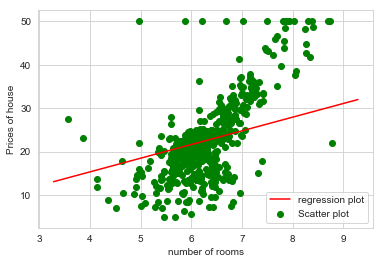

In [71]:
plt.plot(x,y,color='red',label='regression plot')
plt.scatter(x_data,y_data,color='green',label='Scatter plot')
plt.xlabel("number of rooms")
plt.ylabel("Prices of house")
plt.legend()

In [86]:
#r^2=(y-yp)^2/(y-y_mean)^2
ss_predictor=0
ss_mean=0
for i in range(n):
    y_pre=b1*X+b0
    ss_predictor+=(y_pre-y_data[i])**2
    ss_mean+=(y_data[i]-Y)**2

In [87]:
r_square=(ss_predictor/ss_mean)
print(r_square)

1.0713842828493494


In [88]:
from sklearn import linear_model

In [89]:
from sklearn.metrics import mean_squared_error

In [91]:
reg=linear_model.LinearRegression()

In [111]:
x_df=DataFrame(x_data)
y_df=DataFrame(y_data)

In [112]:
reg.fit(x_df,y_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
reg.fit(x_df,y_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
x_df.head()
#print(y_df.head())

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [124]:
reg.predict([[6.575],[6],[8]])

array([[25.17574577],
       [19.94203311],
       [38.14625107]])

In [125]:
reg.intercept_

array([-34.67062078])

In [126]:
reg.coef_

array([[9.10210898]])

In [129]:
reg.score(x_df,y_df)

0.4835254559913343

# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
# Math
import math
# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline


In [6]:
sns.set_style('darkgrid')


In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
import statsmodels.api as sm

In [49]:
def log(t):
    y=1/(1+(math.exp(-1*t)))
    return y

In [53]:
t=np.linspace(-10,10,500)

In [54]:
y=np.array([log(i) for i in t])

Text(0.5,1,'Logistic Regression')

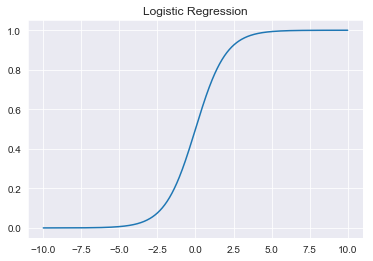

In [56]:
plt.plot(t,y)
plt.title("Logistic Regression")

In [173]:
df=sm.datasets.fair.load_pandas().data

In [174]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [175]:
def had_affair(x):
    if x!=0:
        return 1
    else:
        return 0
       

In [176]:
df['InAffair']=df.affairs.apply(had_affair)

In [177]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,InAffair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [178]:
df.groupby(['InAffair']).count()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
InAffair,,,,,,,,,
0,4313,4313,4313,4313,4313,4313,4313,4313,4313
1,2053,2053,2053,2053,2053,2053,2053,2053,2053


In [179]:
df.groupby(['InAffair']).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
InAffair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [180]:
sns.set_style('whitegrid')

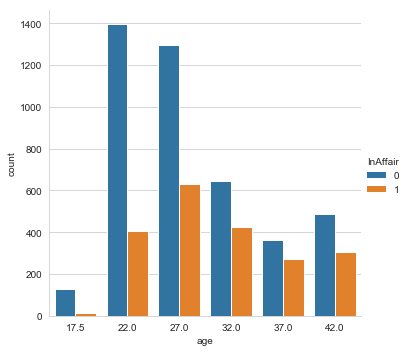

In [181]:
sns.catplot('age',data=df,hue='InAffair',kind='count')

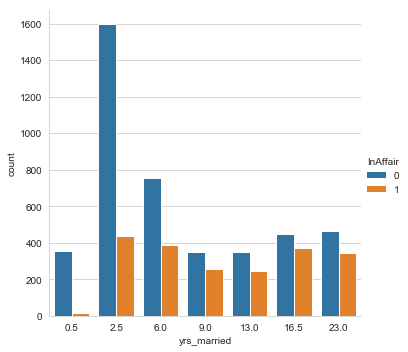

In [182]:
sns.catplot('yrs_married',data=df,hue='InAffair',kind='count')

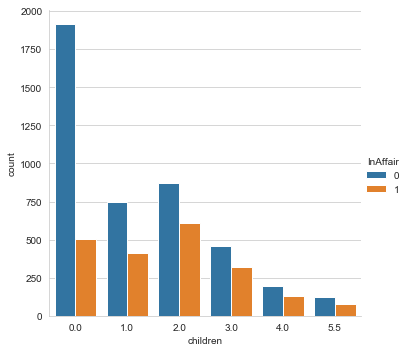

In [183]:
sns.catplot('children',data=df,hue='InAffair',kind='count')

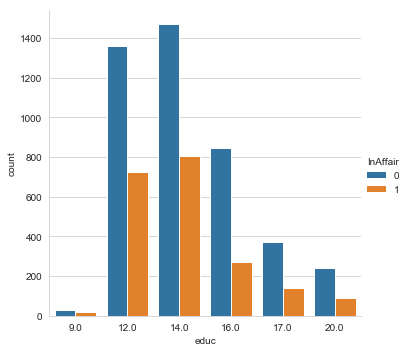

In [184]:
sns.catplot('educ',data=df,hue='InAffair',kind='count')

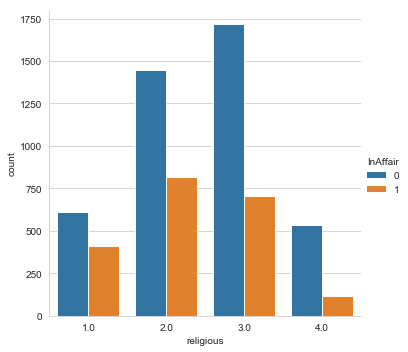

In [185]:
sns.catplot('religious',data=df,hue='InAffair',kind='count')

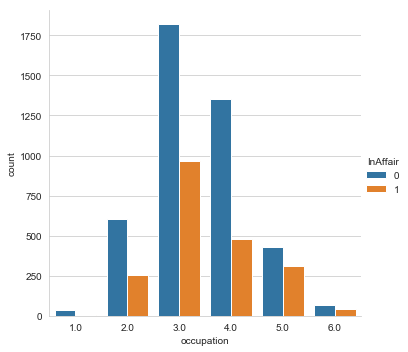

In [186]:
sns.catplot('occupation',data=df,hue='InAffair',kind='count')

In [187]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,InAffair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [188]:
occ_dummies=pd.get_dummies(df['occupation'])

In [189]:
hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

In [190]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [191]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [192]:
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [193]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [194]:
dummies=pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [198]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [200]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [199]:
X=df.drop(['occupation','occupation_husb','InAffair'],axis=1)

In [201]:
X=pd.concat([X,dummies],axis=1)

In [202]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [203]:
Y=df['InAffair']

In [204]:
X=X.drop(['occ1','hocc1'],axis=1)

In [205]:
np.shape(X)

(6366, 17)

In [206]:
Y=np.ravel(Y)

In [207]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [208]:
np.shape(Y)

(6366,)

In [226]:
log=LogisticRegression(solver='liblinear')

In [227]:
log.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [228]:
log.score(X,Y)

0.9787935909519322

In [254]:
coefficient_log=DataFrame(list(zip(X.columns,np.transpose(log.coef_))),columns=['Feature','Coeffcients'])

In [255]:
coefficient_log

,Feature,Coeffcients
0,rate_marriage,[-0.4510266285183844]
1,age,[-0.08256400185079818]
2,yrs_married,[0.16482095537203945]
3,children,[0.06017887849370096]
4,religious,[-0.2391099328261717]
5,educ,[0.015522039382406342]
6,affairs,[18.718675039368158]
7,occ2,[-0.18059772502509738]
8,occ3,[-0.05088763909603525]
9,occ4,[-0.0171539178456566]


In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [266]:
log1=LogisticRegression(solver='liblinear')

In [267]:
log1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [268]:
log1.score(X_train,Y_train)

0.9769585253456221

In [270]:
log1.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [271]:
y_predict=log1.predict(X_test)

In [273]:
metrics.accuracy_score(Y_test,y_predict)

0.9824120603015075

In [274]:
metrics.confusion_matrix(Y_test,y_predict)

array([[1089,    0],
       [  28,  475]], dtype=int64)